In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from googletrans import Translator
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import re

In [2]:
df = pd.read_csv("C:/Users/vijayanandanand/OneDrive - Swinburne University/Drive/Vijay/Personal_Projects/Twitter_DataScrapping/data/TweetData_1.csv")

In [3]:
df.shape

(37391, 36)

In [4]:
def TweetCleansing(tweets, engl=True):
    tweets = re.sub(r'@[A-Za-z0-9]+', '', tweets)
    tweets = re.sub(r'@_[A-Za-z0-9]+', '', tweets)
    tweets = re.sub(r'#', '', tweets)
    tweets = re.sub(r'RT[\s]+', '', tweets)
    tweets = re.sub(r'https?:\/\/S+', '', tweets)
    tweets = re.sub(r'Snyder Cut', '', tweets)
    tweets = re.sub(r'ZacksJusticeLeague', '', tweets)
    tweets = re.sub(r'Justice League', '', tweets)
    tweets = re.sub(r'https', '', tweets)
    tweets = re.sub(r'cut', '', tweets)
    tweets = re.sub(r'co', '', tweets)
    tweets = re.sub(r'de', '', tweets)
    tweets = re.sub(r'que', '', tweets)
    tweets = re.sub(r'Snyr', '', tweets)
    tweets = re.sub(r'SnyrCut', '', tweets)
    tweets = re.sub(r'Cut', '', tweets)
    tweets = re.sub(r'to', '', tweets)
    tweets = re.sub(r'snyr', '', tweets)
    tweets = re.sub(r'o', '', tweets)

    translator = Translator()
    if engl:
        tranTweet = tweets
    else:
        tranTweet = translator.translate(tweets, dest='en').dest

    return tranTweet

In [5]:
df['tweet'] = df['tweet'].apply(TweetCleansing)
df['tweet']

0                    WnrWman is n VOLTS ZacksJusticeLeague
1                    did yu watch the ZacksJusticeLeague ?
2        $821. I hnestly dn't believe it. This is far b...
3        I really enjyed ZacksJusticeLeague  Wish it wu...
4        L per  Jss Whedn   ZacksJusticeLeague  ://t./I...
                               ...                        
37386    Few f my favurite shts/mments frm ZacksJustice...
37387    _XL Oh yes 🙌🏻 mg it’s brilliant 👏🏻👏🏻👏🏻🔥❤️  Zac...
37388    Als can we please, PLEASE talk abut hw abslute...
37389    Setelah ZacksJusticeLeague ba h nn ulang Man f...
37390    L’une s seules scènes  j’aime beauup dans la v...
Name: tweet, Length: 37391, dtype: object

0       @_Be_Like_Mike_ Ouai vir plus qu'une trilgie. ...
1       Just saw minari and it's awesme! Tnight, the  ...
2       Every ther fanbase nw in a pst  wrld..  "we wa...
3       UPDATED: Man Of Steel - 9.5 ZacksJusticeLeague...
4       Passei 4 hras ntem assistind   e minha vnta hj...
                              ...                        
9995    Just watched , i nticed smethings, let's talk ...
9996    S I’m watching the   fr  and I’m just thinking...
9997    Ht Tys Zack 's  Knightmare Batman and Superman...
9998                                           Watching !
9999     can finally breathe a sigh f relief with the ...
Name: tweet, Length: 10000, dtype: object

In [6]:
df = df[df.language == 'en']

In [7]:
df['tweet']

0                    WnrWman is n VOLTS ZacksJusticeLeague
1                    did yu watch the ZacksJusticeLeague ?
2        $821. I hnestly dn't believe it. This is far b...
3        I really enjyed ZacksJusticeLeague  Wish it wu...
4        L per  Jss Whedn   ZacksJusticeLeague  ://t./I...
                               ...                        
37384    I’m nt a  fan but I supprted the   mvement cau...
37385    The ZacksJusticeLeague is the film I've wanted...
37386    Few f my favurite shts/mments frm ZacksJustice...
37387    _XL Oh yes 🙌🏻 mg it’s brilliant 👏🏻👏🏻👏🏻🔥❤️  Zac...
37388    Als can we please, PLEASE talk abut hw abslute...
Name: tweet, Length: 24096, dtype: object

In [8]:
df.shape[0]

24096

In [9]:
analyze = SentimentIntensityAnalyzer()

In [10]:


def getCompScore(tweets):
    return analyze.polarity_scores(tweets)['compound']

In [11]:
df['Compount_Score'] = df['tweet'].apply(getCompScore)

In [12]:
df['Compount_Score'] 

0        0.0000
1        0.0000
2        0.0000
3        0.8010
4        0.5766
          ...  
37384    0.7306
37385    0.7269
37386    0.0000
37387    0.6249
37388   -0.1904
Name: Compount_Score, Length: 24096, dtype: float64

In [13]:
def Analysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

df['Analysis'] = df['Compount_Score'].apply(Analysis)
df['Analysis']

0         Neutral
1         Neutral
2         Neutral
3        Positive
4        Positive
           ...   
37384    Positive
37385    Positive
37386     Neutral
37387    Positive
37388    Negative
Name: Analysis, Length: 24096, dtype: object

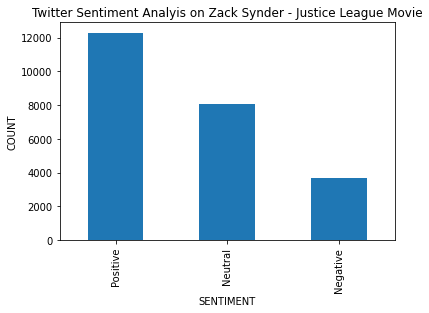

In [14]:
df['Analysis'].value_counts()

plt.title('Twitter Sentiment Analyis on Zack Synder - Justice League Movie')
plt.xlabel('SENTIMENT')
plt.ylabel('COUNT')
df['Analysis'].value_counts().plot(kind='bar')
plt.show()

In [15]:
# % of Positive Tweets

ptweets = df[df.Analysis == 'Positive']
ptweets = ptweets['tweet']

round((ptweets.shape[0] / df.shape[0]) * 100, 1)

51.0

In [16]:
# % of Negative Tweets

ntweets = df[df.Analysis == 'Negative']
ntweets = ntweets['tweet']

round((ntweets.shape[0] / df.shape[0]) * 100, 1)

15.4

In [17]:
# % of Neutral Tweets

neutweets = df[df.Analysis == 'Neutral']
neutweets = neutweets['tweet']

round((neutweets.shape[0] / df.shape[0]) * 100, 1)

33.6

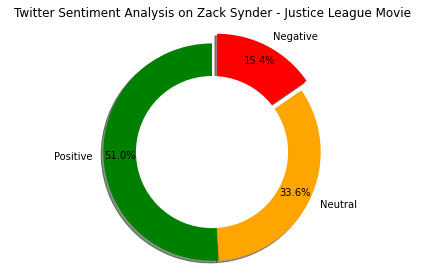

In [18]:
labels = 'Positive', 'Neutral', 'Negative'
sizes = [round((ptweets.shape[0] / df.shape[0]) * 100, 1), round((neutweets.shape[0] / df.shape[0]) * 100, 1), round((ntweets.shape[0] / df.shape[0]) * 100, 1)]
explode = (0, 0, 0.1)
colors = ("Green","Orange","Red")
fig1, ax1 = plt.subplots()
ax1.pie(sizes, colors = colors, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90, pctdistance=0.85)

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

ax1.axis('equal')
plt.title('Twitter Sentiment Analysis on Zack Synder - Justice League Movie')
plt.tight_layout()
plt.show()

In [22]:
df['Compount_Score'].mean()

0.22232506225099602